<h1>Definição de X's e Y's</h1>
<p> Y = Total<br/>X = [Date, Consumption, Wind, Solar, Wind+Solar]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import seaborn as sns 

<h1>Filling NaN values with 0</h1>

In [3]:
#Substitui NaN por 0
database = pd.read_csv("opsd_germany_daily.csv").fillna(0)

database.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,4383.000000,4383.000000,4383.000000
mean,1338.675836,109.800909,44.558071,136.051799
std,165.775710,140.698109,60.853561,171.087206
min,842.395000,0.000000,0.000000,0.000000
25%,1217.859000,0.000000,0.000000,0.000000
50%,1367.123000,62.293000,0.000000,0.000000
75%,1457.761000,162.366000,86.268000,240.698500
max,1709.568000,826.278000,241.580000,851.556000


In [4]:
#Adiciona a coluna "Total"
# database['Total'] = database['Consumption'] + database['Wind'] + database['Solar']  #Adição da coluna 'Total'
database['Wind+Solar'] = database['Wind'] + database['Solar']  #Adapatação da coluna 'Wind+Solar'

database.tail(10)   #Apresenta as 10 ultimas linhas do dataset

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


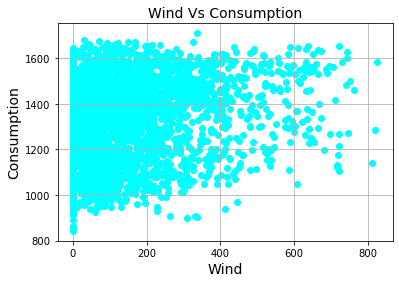

In [5]:
#grafico de Wind vs Consumption
plt.scatter(database['Wind'], database['Consumption'], color='cyan')
plt.title('Wind Vs Consumption', fontsize=14)
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Consumption', fontsize=14)
plt.grid(True)
plt.show()

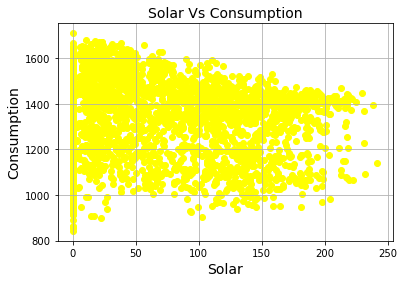

In [6]:
#grafico de Solar vs Consumption
plt.scatter(database['Solar'], database['Consumption'], color='yellow')
plt.title('Solar Vs Consumption', fontsize=14)
plt.xlabel('Solar', fontsize=14)
plt.ylabel('Consumption', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
#Gera um modelo de regressão linear multipla 
#Letra a)
X = database[['Wind','Solar']]
Y = database['Consumption']

regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1335.4130788125613
Coefficients: 
 [ 0.1702035  -0.34619411]


In [8]:
#função que retora Consumption utilizando "Wind" e "Solar"
def FindConsumption(Wind, Solar):
    print("Consumption:\n ", end='')
    return(regr.intercept_ + regr.coef_[0]*Wind + regr.coef_[1]*Solar)

In [9]:
print(FindConsumption(200, 458))

Consumption:
 1210.896873827782


In [10]:
#Descobrindo R2
#Letra b)

R2 = r2_score(Y, regr.predict(X))
print('R2:', R2)

R2: 0.028905246894988634


In [11]:
#Letra c)
#Pearson Correlation
corr, _ = pearsonr(database['Wind+Solar'], database['Consumption'])
print(corr)

0.06407153302661359


In [12]:
#Letra c)
#Spearman Correlation
corr, _ = spearmanr(database['Wind+Solar'], database['Consumption'])
print(corr)

0.04893261742290543


In [13]:
#Letra c)
#Pearson Correlation
corr, _ = pearsonr(database['Solar'], database['Consumption'])
print(corr)

-0.09516507083773182


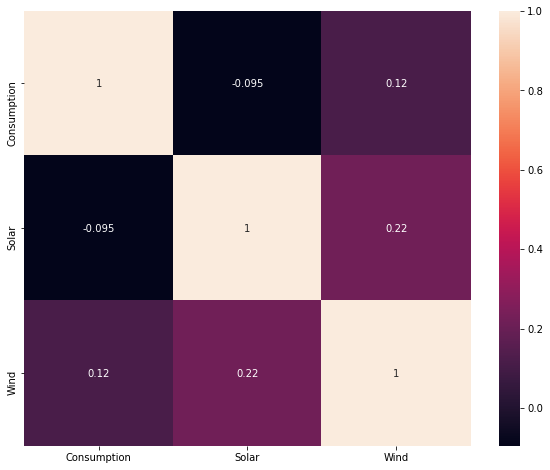

In [14]:
corr = database[['Consumption', 'Solar', 'Wind']].corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True) 

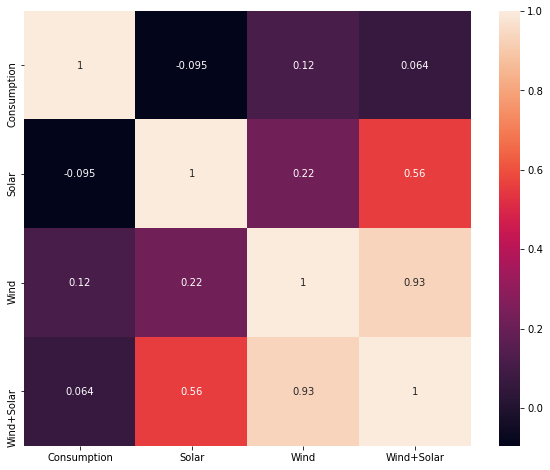

In [15]:
corr = database[['Consumption', 'Solar', 'Wind', 'Wind+Solar']].corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True) 